In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import missingno as msn

In [2]:
base_url = 'https://phoneshopkenya.co.ke/?orderby=price-desc&paged=1&s=&product_cat=smartphones&post_type=product'

phoneshop Kenya

In [3]:
# pages = 16
titles = []
prices = []

for i in range(1,16):
    url = f'https://phoneshopkenya.co.ke/page/{i}/?orderby=price-desc&s&product_cat=smartphones&post_type=product'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        divs = soup.find_all('div', class_='product-inner')
        for div in divs:
            if div.find('span', class_='woocommerce-Price-amount'):
                title = div.find('h2', class_='woocommerce-loop-product__title').text
                titles.append(title)
                price = div.find('span', class_='woocommerce-Price-amount').text
                prices.append(price)
            else:
                break

            print(f'{title} : {price}')
    else:
        print('INVALID RESPONSE')


Xiaomi Mix Fold 3 : KSh 258,500.00
Oppo Find N3 Flip : KSh 250,000.00
Google Pixel 9 Pro Fold : KSh 245,000.00
Samsung Galaxy Z Fold 6 : KSh 175,000.00
iPhone 16 Pro Max 512GB : KSh 240,000.00
XPERIA 1 V (512GB) : KSh 240,000.00
Apple iPhone 16 Pro Max 256GB : KSh 210,000.00
Huawei Pura 70 Ultra : KSh 200,000.00
Huawei P50 Pocket : KSh 199,999.00
iPhone 16 Plus 256GB : KSh 188,000.00
Apple iphone 15 Pro Max : KSh 156,000.00
Huawei P60 Pro 5G : KSh 180,500.00
Apple iPhone 16 Pro 256GB : KSh 176,000.00
Motorola Edge 50 Fusion : KSh 176,000.00
Xiaomi 14 Ultra : KSh 175,000.00
Google Pixel Fold : KSh 173,500.00
Apple iPhone 16 Pro 128GB : KSh 172,500.00
Oppo Find X7 Ultra : KSh 170,000.00
Samsung Galaxy Z Fold 5 : KSh 158,000.00
Google Pixel 9 Pro : KSh 167,000.00
OnePlus Open : KSh 165,000.00
Oneplus 11 Pro 5G : KSh 165,000.00
Samsung Galaxy Z Fold3 5G (512GB) : KSh 165,000.00
Exploring the MacBook Air 13.6 inch M2: A Comprehensive Review : KSh 163,000.00
Oneplus 11 Pro 5G 256GB | 16GB RA

In [4]:
# Getting the titles and prices together
titles_and_prices = {}
for i in range(480):
    titles_and_prices[titles[i]] = prices[i]

price in kenya

In [5]:
price_in_kenya_phones = {}
for i in range(1,18):
    url = f'https://www.priceinkenya.com/phones?page={i}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        unordered_list = soup.find('ul', class_='grid')
        lists = unordered_list.find_all('li', class_='relative')
        for li in lists:
            results = []
            results.append(li.find_all('p', class_='text-sm'))
            name = results[0][0].text
            price = results[0][1].text
            price_in_kenya_phones[name] = price

In [6]:
len(price_in_kenya_phones)

192

In [7]:
# Getting brand urls of price in kenya phones from phone arena
price_in_kenya_brand_urls = {}
for p in range(1,62):
    url = f'https://www.phonearena.com/phones/manufacturers/alcatel,apple,asus,google,hmd,honor,huawei,motorola,nokia,nothing,oneplus,oppo,realme,samsung,sony,vivo,xiaomi,zte/page/{p}?f%5B53%5D%5B0%5D=1223'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        div = soup.find('div', class_='stream')
        
        if div:
            bracket = div.find_all('div', class_='widget')
            if bracket:
                for b in bracket:
                    name = b.find('p').text
                    if name in titles:
                        price_in_kenya_brand_urls[name] = b.find('a')['href']
            else:
                print('bracket not found')
        else:
            print('Div not found')
    else:
        print(response.status_code)

bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found


In [8]:
len(price_in_kenya_brand_urls)

73

In [9]:
brands = []
for t in titles:
    if t.split()[0] not in brands:
        brands.append(t.split()[0])


In [10]:
# Getting brand urls of phone store kenya from phone arena
brand_urls = {}
for p in range(1,62):
    url = f'https://www.phonearena.com/phones/manufacturers/alcatel,apple,asus,google,hmd,honor,huawei,motorola,nokia,nothing,oneplus,oppo,realme,samsung,sony,vivo,xiaomi,zte/page/{p}?f%5B53%5D%5B0%5D=1223'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        div = soup.find('div', class_='stream')
        
        if div:
            bracket = div.find_all('div', class_='widget')
            if bracket:
                for b in bracket:
                    name = b.find('p').text
                    if name in titles:
                        brand_urls[name] = b.find('a')['href']
            else:
                print('bracket not found')
        else:
            print('Div not found')
    else:
        print(response.status_code)

bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found
bracket not found


In [11]:
brand_urls

{'Samsung Galaxy S24 FE': 'https://www.phonearena.com/phones/Samsung-Galaxy-S24-FE_id12417',
 'Google Pixel 9 Pro Fold': 'https://www.phonearena.com/phones/Google-Pixel-9-Pro-Fold_id12400',
 'OnePlus Nord 4': 'https://www.phonearena.com/phones/OnePlus-Nord-4_id12401',
 'Google Pixel 9 Pro XL': 'https://www.phonearena.com/phones/Google-Pixel-9-Pro-XL_id12379',
 'Huawei Pura 70 Ultra': 'https://www.phonearena.com/phones/Huawei-Pura-70-Ultra_id12368',
 'Motorola Edge 50 Fusion': 'https://www.phonearena.com/phones/Motorola-Edge-50-Fusion_id12357',
 'Sony Xperia 1 VI': 'https://www.phonearena.com/phones/Sony-Xperia-1-VI_id12339',
 'Xiaomi 14 Ultra': 'https://www.phonearena.com/phones/Xiaomi-14-Ultra_id12337',
 'Honor Magic 6 Pro': 'https://www.phonearena.com/phones/Honor-Magic-6-Pro_id12289',
 'Samsung Galaxy Z Fold 6': 'https://www.phonearena.com/phones/Samsung-Galaxy-Z-Fold-6_id12288',
 'Google Pixel 9 Pro': 'https://www.phonearena.com/phones/Google-Pixel-9-Pro_id12285',
 'Google Pixel 9'

In [12]:
len(brand_urls)

73

In [13]:
# Getting the unique phones that were found from both sites
uniques_phones = []
for k in brand_urls.keys():
    uniques_phones.append(k)

for k in price_in_kenya_brand_urls.keys():
    if k not in uniques_phones:
        uniques_phones.append(k)

len(uniques_phones)

73

The length being 72 indicates its still the same phones across the board whose characteristics are found

In [14]:
# getting the phones not found in phone arena
keys = []
for k in brand_urls:
    keys.append(k)

absent = [t for t in titles if t not in keys]

In [15]:
len(absent)

407

In [16]:
len(titles)

480

In [17]:
len(titles_and_prices)

479

In [18]:
if 'Samsung Galaxy S24 FE' in titles:
    print(True)

True


In [19]:
count = 0
for t in titles:
    count+=1
    if t == 'Samsung Galaxy S24 FE':
        break

In [20]:
count

78

In [21]:
len(titles_and_prices)

479

Get the details for the brands found


In [22]:
present_phone_data = []
for n,link in brand_urls.items():
    url = link
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        current_phone = {'Phone_name': n}
        current_phone['Price'] = titles_and_prices[n].replace('KSh', '').strip()
        spec_containers = soup.find_all('a', class_='widgetQuickSpecs__link')

        for container in spec_containers:
            # Extract the spec title
            spec_title = container.find('h5', class_='widgetQuickSpecs__title_heading').text.strip()

            # Extract the spec value
            spec_value = container.find('p', class_='widgetQuickSpecs__title_paragraph').text.strip()

            # Handling multiple specs in one field, splitting based on patterns
            if spec_title == 'Display':
                # Split the display size and resolution
                display_specs = spec_value.split('\n')  # Split by new lines
                if len(display_specs) == 2:
                    current_phone["Display Size"] = display_specs[0]
                    current_phone["Resolution"] = display_specs[1]
                elif len(display_specs) == 3:
                    current_phone["Display Size"] = display_specs[0]
                    current_phone["Resolution"] = display_specs[1]
                    refresh_rate = display_specs[2].split(' ')[0]
                    current_phone["Refresh Rate"] = refresh_rate
                else:
                    current_phone["Display"] = spec_value
            
            elif spec_title == 'Camera':
                # Split rear and front camera specs
                camera_specs = spec_value.split('\n')
                if len(camera_specs) == 2:
                    current_phone["Rear Camera"] = camera_specs[0]
                    current_phone["Front Camera"] = camera_specs[1]
                else:
                    current_phone["Camera"] = spec_value
            
            elif spec_title == 'Hardware':
                hardware_specs = spec_value.split('\n')
                if len(hardware_specs) == 2:
                    current_phone['Processor']  = hardware_specs[0]
                    current_phone['RAM']  = hardware_specs[1]
            elif spec_title == 'Battery':
                battery_specs = spec_value
                current_phone['Battery'] = battery_specs
            elif spec_title == 'Storage':
                storage_specs = spec_value.split(',')
                current_phone['Storage'] = storage_specs[0]
            elif  spec_title == 'Released' or spec_title == 'Expected release':
                current_phone['Release Date'] = spec_value
            else:
                # Default case: Print the title and value as is
                print(f"{spec_title}: {spec_value}")
            
        present_phone_data.append(current_phone)
    print('\n') 

OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 
EMUI UI


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 14
MagicOS 8.0 UI


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 13


OS: Android 14


OS: Android 14
One UI 16 UI


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 14


OS: Android 13


OS: Android 13


OS: Android 14


OS: Android 14


OS: Android 13


OS: Android


OS: Android 12


OS: Android 13


OS: Android 14


OS: Android 13


OS: Android


OS: Android 13


OS: Android 13


OS: Android 13






OS: Android 12


OS: iOS 17.x


OS: Android 12


OS: Android 13


OS: Android 13


OS: Android 12


OS: Android 12
One UI UI


OS: Android 11


OS: Android 13
One UI UI


OS: Android 11


OS: Android 13


OS: HarmonyOS 2


OS: Android 11


OS: Android


OS: Android 12
ONE UI UI


OS: Android 12


OS: Android 12


OS: Android 12


OS: HarmonyOS 2


OS: Android 11


OS: Android 11


OS: An

In [23]:
temp = []
for a in absent:
    temp.append(a.split(' ')[0])

In [24]:
absent_brands = []
for t in temp:
    if t not in absent_brands:
        absent_brands.append(t)
    else:
        pass

In [25]:
len(absent_brands)

47

In [26]:
# Try using gsmaerena to get the characteristics of the phones lacking ib phonearena
url = 'https://www.gsmarena.com/'
gsmarena_links = []
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    div = soup.find('div', class_='brandmenu-v2')
    lists = div.find_all('li')
    for li in lists:
        brand = li.find('a').text
        print(brand)
        if brand in absent:
            link = li.find('a')['href']  
            print(link)
            if link not in gsmarena_links:
                gsmarena_links.append(link)
        else:
            print('Not in')

Samsung
Not in
Apple
Not in
Huawei
Not in
Nokia
Not in
Sony
Not in
LG
Not in
HTC
Not in
Motorola
Not in
Lenovo
Not in
Xiaomi
Not in
Google
Not in
Honor
Not in
Oppo
Not in
Realme
Not in
OnePlus
Not in
Nothing
Not in
vivo
Not in
Meizu
Not in
Asus
Not in
Alcatel
Not in
ZTE
Not in
Microsoft
Not in
Umidigi
Not in
Energizer
Not in
Cat
Not in
Sharp
Not in
Micromax
Not in
Infinix
Not in
Ulefone
Not in
Tecno
Not in
Doogee
Not in
Blackview
Not in
Cubot
Not in
Oukitel
Not in
Itel
Not in
TCL
Not in


Did not work due to the scraping restriction by gsmarena

In [27]:
present_phone_data

[{'Phone_name': 'Samsung Galaxy S24 FE',
  'Price': '81,500.00',
  'Release Date': 'Oct 03, 2024',
  'Display Size': '6.7 inches',
  'Resolution': '2340 x 1080 pixels',
  'Refresh Rate': '120Hz',
  'Rear Camera': '50 MP (Triple camera)',
  'Front Camera': '10 MP front',
  'Processor': 'Exynos 2400e',
  'RAM': '8GB RAM',
  'Storage': '128GB',
  'Battery': '4700 mAh'},
 {'Phone_name': 'Google Pixel 9 Pro Fold',
  'Price': '245,000.00',
  'Release Date': 'Sep 04, 2024',
  'Display Size': '8.0 inches',
  'Resolution': '2152 x 2076 pixels',
  'Refresh Rate': '120Hz',
  'Rear Camera': '48 MP (Triple camera)',
  'Front Camera': '10 MP front',
  'Processor': 'Google Tensor G4',
  'RAM': '16GB RAM',
  'Storage': '256GB',
  'Battery': '4650 mAh'},
 {'Phone_name': 'OnePlus Nord 4',
  'Price': '57,000.00',
  'Release Date': 'Aug 08, 2024',
  'Display Size': '6.7 inches',
  'Resolution': '2772 x 1240 pixels',
  'Refresh Rate': '120Hz',
  'Rear Camera': '50 MP (Dual camera)',
  'Front Camera': '16 M

In [28]:
phones_data = pd.DataFrame(present_phone_data)

In [29]:
phones_data

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery,Camera
0,Samsung Galaxy S24 FE,"81,500.00","Oct 03, 2024",6.7 inches,2340 x 1080 pixels,120Hz,50 MP (Triple camera),10 MP front,Exynos 2400e,8GB RAM,128GB,4700 mAh,NaN
1,Google Pixel 9 Pro Fold,"245,000.00","Sep 04, 2024",8.0 inches,2152 x 2076 pixels,120Hz,48 MP (Triple camera),10 MP front,Google Tensor G4,16GB RAM,256GB,4650 mAh,NaN
2,OnePlus Nord 4,"57,000.00","Aug 08, 2024",6.7 inches,2772 x 1240 pixels,120Hz,50 MP (Dual camera),16 MP front,Qualcomm Snapdragon 7+ Gen 3,8GB RAM,128GB,5500 mAh,NaN
3,Google Pixel 9 Pro XL,"145,000.00","Aug 22, 2024",6.8 inches,2992 x 1344 pixels,120Hz,50 MP (Triple camera),42 MP front,Google Tensor G4,16GB RAM,128GB,5060 mAh,NaN
4,Huawei Pura 70 Ultra,"200,000.00","Apr 29, 2024",6.8 inches,2844 x 1280 pixels,120Hz,50 MP (Triple camera),13 MP front,Kirin 9010,16GB RAM,512GB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Samsung Galaxy A71,"44,500.00","Jan 31, 2020",6.7 inches,2400 x 1080 pixels,60Hz,64 MP (Quad camera),32 MP front,Qualcomm Snapdragon 730,6GB RAM,128GB,4500 mAh,NaN
69,Google Pixel 4,"25,500.00","Oct 24, 2019",5.7 inches,2280 x 1080 pixels,90Hz,12.2 MP (Dual camera),8 MP front,Qualcomm Snapdragon 855,6GB RAM,64GB,2800 mAh,NaN
70,Apple iPhone 11,"55,000.00","Sep 20, 2019",6.1 inches,1792 x 828 pixels,NaN,12 MP (Dual camera),12 MP front,Apple A13 Bionic,4GB RAM,64GB,3110 mAh,NaN
71,Huawei P30 Pro,"48,000.00","Apr 05, 2019",6.5 inches,2340 x 1080 pixels,NaN,40 MP (Quad camera),32 MP front,HiSilicon Kirin 980,6GB RAM,128GB,4200 mAh,NaN


In [30]:
phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phone_name    73 non-null     object
 1   Price         73 non-null     object
 2   Release Date  72 non-null     object
 3   Display Size  73 non-null     object
 4   Resolution    73 non-null     object
 5   Refresh Rate  61 non-null     object
 6   Rear Camera   71 non-null     object
 7   Front Camera  71 non-null     object
 8   Processor     70 non-null     object
 9   RAM           70 non-null     object
 10  Storage       72 non-null     object
 11  Battery       71 non-null     object
 12  Camera        2 non-null      object
dtypes: object(13)
memory usage: 7.5+ KB


<Axes: >

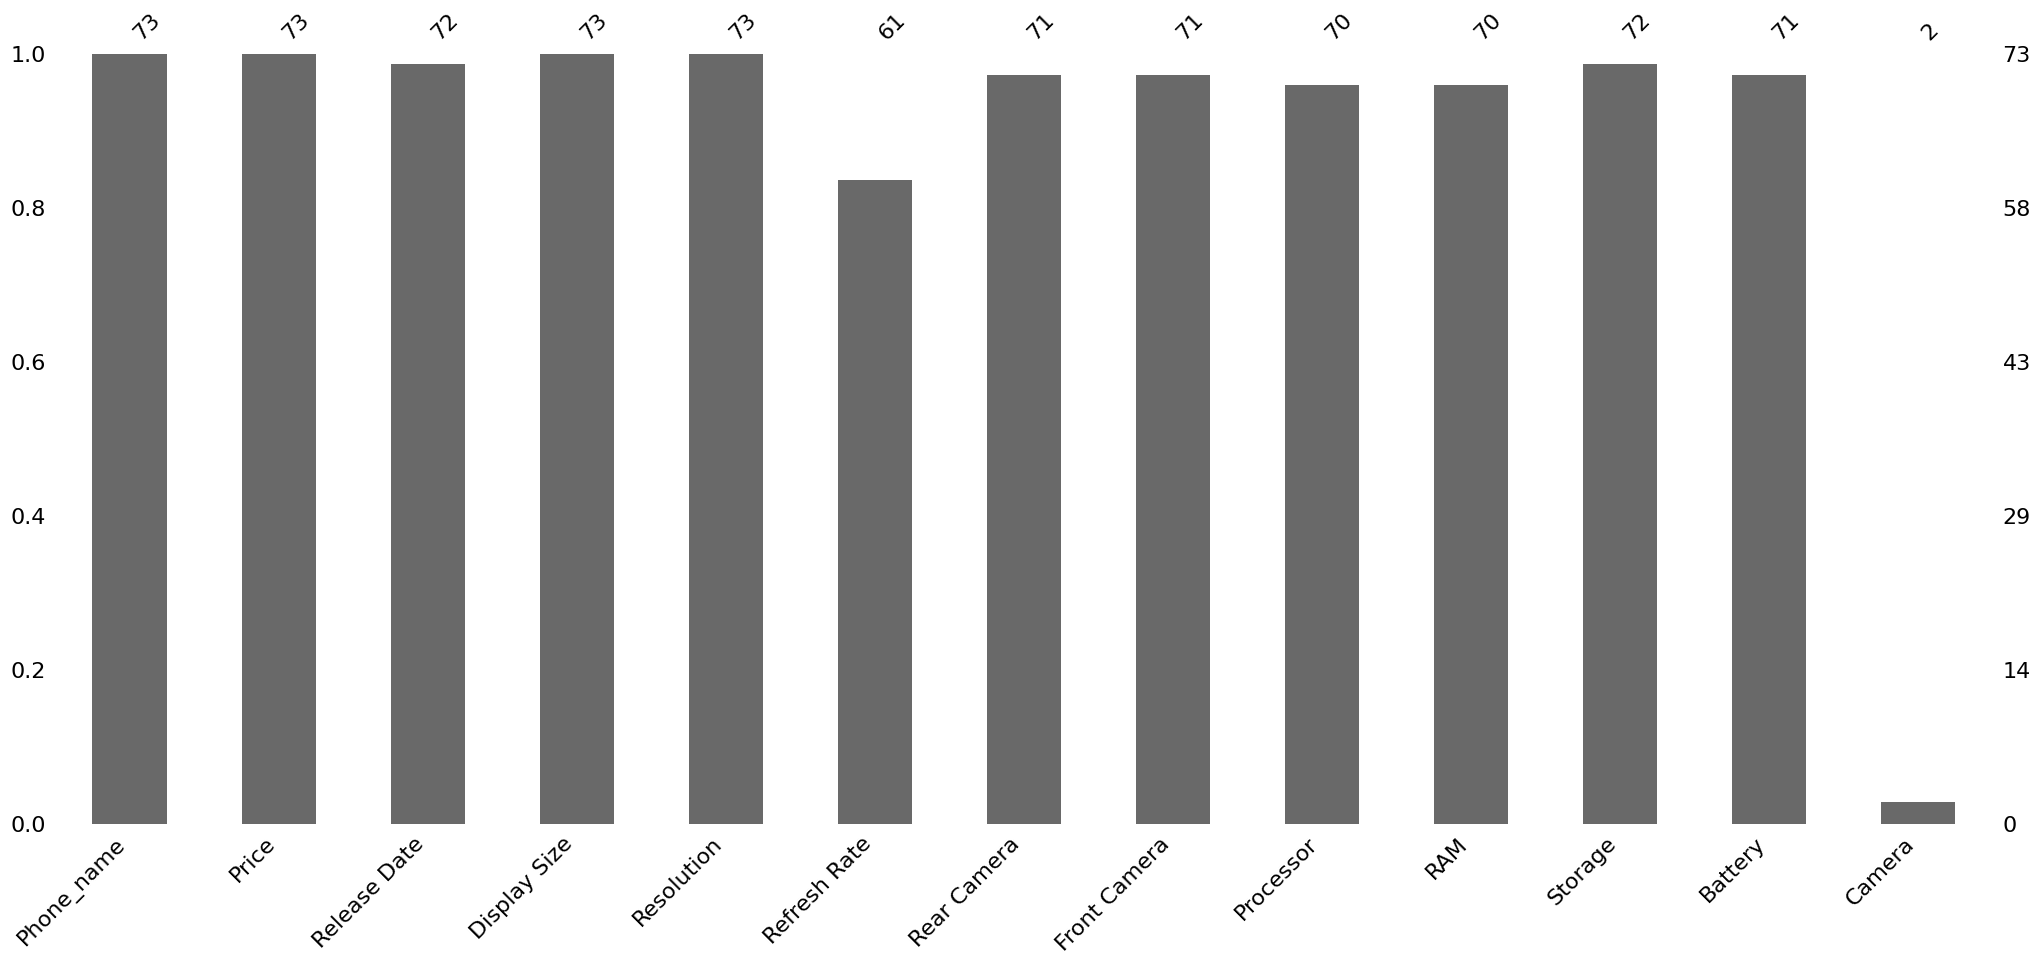

In [31]:
msn.bar(phones_data)

Fixing Refresh Rates

In [32]:
phones_data[phones_data['Refresh Rate'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery,Camera
5,Motorola Edge 50 Fusion,"176,000.00","May 15, 2024",6.7 inches,2400 x 1080 pixels,NaN,50 MP (Dual camera),32 MP front,Qualcomm Snapdragon 7s Gen 3,8GB RAM,256GB,5000 mAh,NaN
29,Samsung Galaxy A14 5G,"34,000.00","Jan 12, 2023",6.6 inches,2400 x 1080 pixels,NaN,50 MP (Triple camera),13 MP front,Mediatek Dimensity 700,4GB RAM,64GB,5000 mAh,NaN
34,Nokia 8210 4G,"15,000.00","Jul 28, 2022",2.8 inches,320 x 240 pixels,NaN,NaN,NaN,NaN,NaN,0.128GB,1450 mAh,0.3 MP VGA (Single camera)
35,Nokia 2660 Flip,"8,000.00","Jul 28, 2022",2.8 inches,320 x 240 pixels,NaN,NaN,NaN,NaN,NaN,0.128GB,1450 mAh,0.3 MP VGA (Single camera)
58,Nokia X20,"25,500.00","May 01, 2021",6.7 inches,1080 x 2400 pixels,NaN,64 MP (Quad camera),32 MP front,Qualcomm Snapdragon 480 5G,6GB RAM,128GB,4470 mAh,NaN
62,Nokia 2.4,"13,500.00","Sep 23, 2020",6.5 inches,1600 x 720 pixels,NaN,13 MP (Dual camera),5 MP front,MediaTek Helio P22,2GB RAM,32GB,4500 mAh,NaN
63,Xiaomi Redmi 9A,"11,500.00","Jul 15, 2020",6.5 inches,1600 x 720 pixels,NaN,13 MP (Single camera),5 MP front,MediaTek Helio G25,2GB RAM,32GB,5000 mAh,NaN
65,Samsung Galaxy M01,"13,800.00","Jun 02, 2020",5.7 inches,1520 x 720 pixels,NaN,13 MP (Dual camera),5 MP front,Qualcomm Snapdragon 439,3GB RAM,32GB,4000 mAh,NaN
67,Samsung Galaxy Z Flip,"148,500.00","Feb 14, 2020",6.7 inches,2636 x 1080 pixels,NaN,12 MP (Dual camera),10 MP front,Qualcomm Snapdragon 855+,8GB RAM,256GB,3300 mAh,NaN
70,Apple iPhone 11,"55,000.00","Sep 20, 2019",6.1 inches,1792 x 828 pixels,NaN,12 MP (Dual camera),12 MP front,Apple A13 Bionic,4GB RAM,64GB,3110 mAh,NaN


Manually fill the missing refresh rates

In [33]:
phones_data.loc[phones_data['Phone_name'] == 'Motorola Edge 50 Fusion', 'Refresh Rate'] = 144
phones_data.loc[phones_data['Phone_name'] == 'Samsung Galaxy A14 5G', 'Refresh Rate'] = 90
phones_data.loc[phones_data['Phone_name'] == 'Nokia 8210 4G', 'Refresh Rate'] = 90
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2660 Flip', 'Refresh Rate'] = 120
phones_data.loc[phones_data['Phone_name'] == 'Nokia X20', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2.4', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Xiaomi Redmi 9A', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Samsung Galaxy M01', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Samsung Galaxy Z Flip', 'Refresh Rate'] = 120
phones_data.loc[phones_data['Phone_name'] == 'Apple iPhone 11', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Huawei P30 Pro', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Huawei P30 Lite', 'Refresh Rate'] = 60
phones_data.loc[phones_data['Phone_name'] == 'Alcatel 1', 'Refresh Rate'] = 60

Camera has too many missing Values

In [34]:
phones_data['Camera'].isnull().sum()

np.int64(71)

In [35]:
# Dropping The camera column
phones_data.drop(columns=['Camera'], inplace=True)

Fixing the Release Date

In [36]:
phones_data['Release Date'] = phones_data['Release Date'].apply(lambda x: pd.to_datetime(x))

In [37]:
phones_data['RAM'].isnull().sum()

np.int64(3)

Fixing Camera

In [38]:
phones_data[phones_data['Front Camera'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
34,Nokia 8210 4G,"15,000.00",2022-07-28,2.8 inches,320 x 240 pixels,90,NaN,NaN,NaN,NaN,0.128GB,1450 mAh
35,Nokia 2660 Flip,"8,000.00",2022-07-28,2.8 inches,320 x 240 pixels,120,NaN,NaN,NaN,NaN,0.128GB,1450 mAh


In [39]:
phones_data.loc[phones_data['Phone_name'] == 'Nokia 8210 4G', 'Front Camera'] = '5 MP'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 8210 4G', 'Rear Camera'] = '8 MP'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2660 Flip', 'Front Camera'] = '0 MP'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2660 Flip', 'Rear Camera'] = '0.3 MP'

Processor

In [40]:
phones_data[phones_data['Processor'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
34,Nokia 8210 4G,"15,000.00",2022-07-28,2.8 inches,320 x 240 pixels,90,8 MP,5 MP,NaN,NaN,0.128GB,1450 mAh
35,Nokia 2660 Flip,"8,000.00",2022-07-28,2.8 inches,320 x 240 pixels,120,0.3 MP,0 MP,NaN,NaN,0.128GB,1450 mAh
49,Samsung Galaxy A03,"13,500.00",2022-01-10,6.5 inches,1600 x 720 pixels,60Hz,48 MP (Dual camera),5 MP front,NaN,NaN,32GB,5000 mAh


In [41]:
phones_data.loc[phones_data['Phone_name'] == 'Samsung Galaxy A03', 'Processor'] = 'Unisoc T616'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2660 Flip', 'Processor'] = 'Unisoc T107'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 8210 4G', 'Processor'] = 'Unisoc T107'

RAM

In [42]:
pd.options.display.max_rows = 1000

In [43]:
phones_data['RAM']

0      8GB RAM
1     16GB RAM
2      8GB RAM
3     16GB RAM
4     16GB RAM
5      8GB RAM
6     12GB RAM
7     16GB RAM
8     12GB RAM
9     12GB RAM
10    16GB RAM
11    12GB RAM
12    16GB RAM
13     8GB RAM
14     6GB RAM
15     4GB RAM
16     6GB RAM
17     8GB RAM
18    12GB RAM
19    12GB RAM
20    16GB RAM
21     6GB RAM
22    12GB RAM
23     8GB RAM
24     8GB RAM
25     8GB RAM
26     6GB RAM
27    12GB RAM
28    12GB RAM
29     4GB RAM
30     8GB RAM
31     6GB RAM
32    12GB RAM
33     8GB RAM
34         NaN
35         NaN
36     4GB RAM
37     6GB RAM
38    12GB RAM
39     8GB RAM
40    12GB RAM
41     6GB RAM
42     6GB RAM
43     6GB RAM
44     6GB RAM
45     3GB RAM
46     8GB RAM
47     8GB RAM
48     6GB RAM
49         NaN
50     6GB RAM
51     8GB RAM
52    12GB RAM
53     3GB RAM
54     8GB RAM
55     4GB RAM
56     4GB RAM
57     8GB RAM
58     6GB RAM
59     6GB RAM
60     6GB RAM
61     4GB RAM
62     2GB RAM
63     2GB RAM
64     2GB RAM
65     3GB RAM
66     8GB

In [44]:
phones_data[phones_data['RAM'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
34,Nokia 8210 4G,"15,000.00",2022-07-28,2.8 inches,320 x 240 pixels,90,8 MP,5 MP,Unisoc T107,NaN,0.128GB,1450 mAh
35,Nokia 2660 Flip,"8,000.00",2022-07-28,2.8 inches,320 x 240 pixels,120,0.3 MP,0 MP,Unisoc T107,NaN,0.128GB,1450 mAh
49,Samsung Galaxy A03,"13,500.00",2022-01-10,6.5 inches,1600 x 720 pixels,60Hz,48 MP (Dual camera),5 MP front,Unisoc T616,NaN,32GB,5000 mAh


In [45]:
phones_data.loc[phones_data['Phone_name'] == 'Nokia 8210 4G', 'RAM'] = '0.048GB'
phones_data.loc[phones_data['Phone_name'] == 'Nokia 2660 Flip', 'RAM'] = '0.048GB'
phones_data.loc[phones_data['Phone_name'] == 'Samsung Galaxy A03', 'RAM'] = '2GB'

Storage

In [46]:
phones_data[phones_data['Storage'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
54,Huawei P50,"85,000.00",2021-08-12,6.5 inches,2700 x 1224 pixels,90Hz,50 MP (Quad camera),13 MP front,Qualcomm 888 4G,8GB RAM,NaN,4100 mAh


In [47]:
phones_data.loc[phones_data['Phone_name'] == 'Huawei P50', 'Storage'] = '128GB'

Battery

In [48]:
phones_data[phones_data['Battery'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
4,Huawei Pura 70 Ultra,"200,000.00",2024-04-29,6.8 inches,2844 x 1280 pixels,120Hz,50 MP (Triple camera),13 MP front,Kirin 9010,16GB RAM,512GB,NaN
36,Nokia G11 Plus,"15,500.00",2022-07-20,6.5 inches,1600 x 720 pixels,90Hz,50 MP (Dual camera),8 MP front,Unisoc,4GB RAM,64GB,NaN


In [49]:
phones_data.loc[phones_data['Phone_name'] == 'Huawei Pura 70 Ultra', 'Battery'] = '5200mAh'
phones_data.loc[phones_data['Phone_name'] == 'Nokia G11 Plus', 'Battery'] = '5000mAh'

Release Date

In [50]:
phones_data[phones_data['Release Date'].isnull()]

,Phone_name,Price,Release Date,Display Size,Resolution,Refresh Rate,Rear Camera,Front Camera,Processor,RAM,Storage,Battery
25,Huawei P60,"80,000.00",NaT,6.7 inches,2700 x 1220 pixels,120Hz,48 MP (Triple camera),13 MP front,Qualcomm Snapdragon 8+ Gen 1 4G,8GB RAM,256GB,4815 mAh


In [51]:
phones_data.loc[phones_data['Phone_name'] == 'Huawei P60', 'Release Date'] = pd.to_datetime('March 23, 2023')

In [52]:
phones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Phone_name    73 non-null     object        
 1   Price         73 non-null     object        
 2   Release Date  73 non-null     datetime64[ns]
 3   Display Size  73 non-null     object        
 4   Resolution    73 non-null     object        
 5   Refresh Rate  73 non-null     object        
 6   Rear Camera   73 non-null     object        
 7   Front Camera  73 non-null     object        
 8   Processor     73 non-null     object        
 9   RAM           73 non-null     object        
 10  Storage       73 non-null     object        
 11  Battery       73 non-null     object        
dtypes: datetime64[ns](1), object(11)
memory usage: 7.0+ KB


Creating as CSV file

In [53]:
phones_data.to_csv('phones_data.csv')